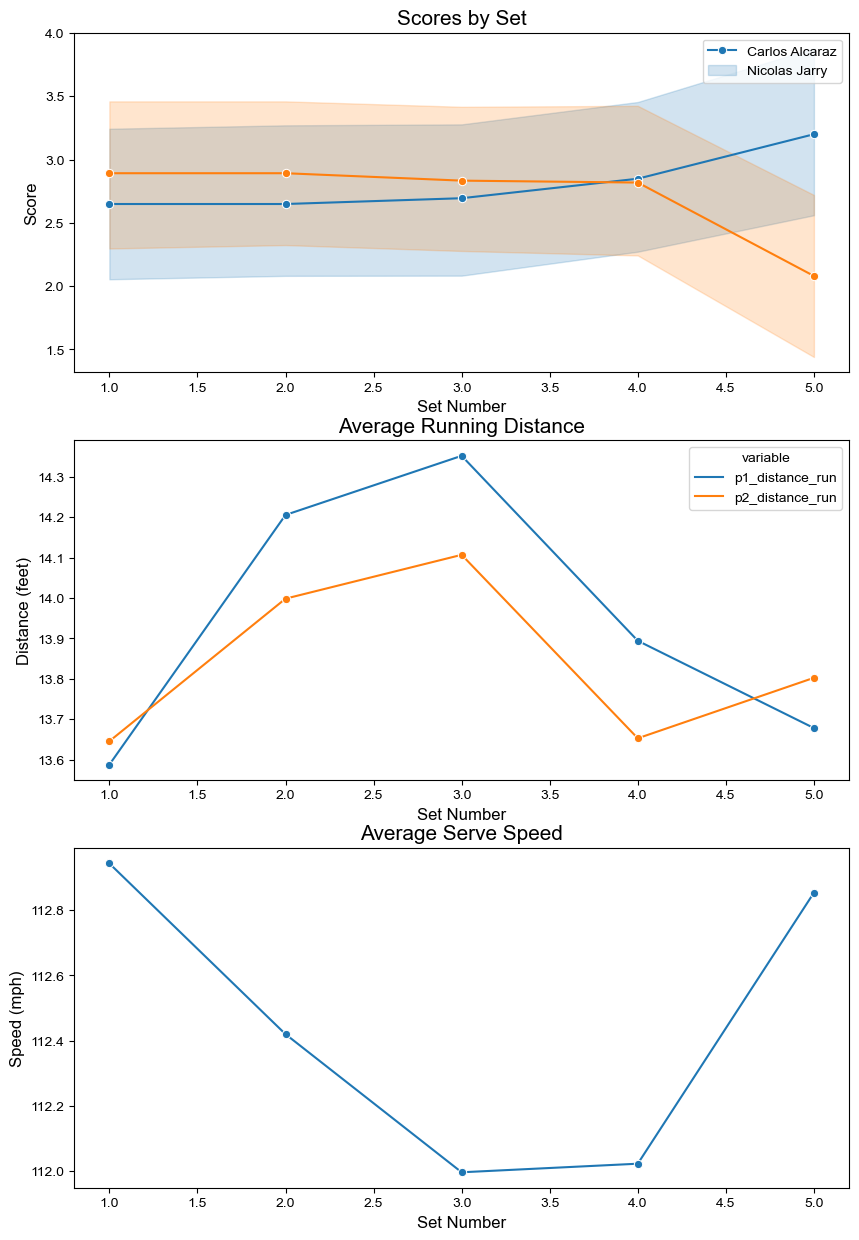

转换次数矩阵:
        P1_win  P2_win
P1_win    2017    1700
P2_win    1701    1865

转换概率矩阵:
          P1_win    P2_win
P1_win  0.542642  0.457358
P2_win  0.477005  0.522995


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/home/ebotian/Documents/Wimbledon_featured_matches.csv'
data = pd.read_csv(file_path)

scores = data[['set_no', 'p1_games', 'p2_games']].drop_duplicates()
avg_run_distance = data.groupby('set_no')[['p1_distance_run', 'p2_distance_run']].mean().reset_index()
avg_speed = data.groupby('set_no')['speed_mph'].mean().reset_index()

# 设置图表字体
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = True
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Scores by set
sns.lineplot(x='set_no', y='value', hue='variable', data=pd.melt(scores, ['set_no']), ax=axs[0], marker='o')
axs[0].set_title('Scores by Set', fontsize=15)
axs[0].set_xlabel('Set Number', fontsize=12)
axs[0].set_ylabel('Score', fontsize=12)
axs[0].legend(['Carlos Alcaraz', 'Nicolas Jarry'])  # 为制图添加个人的比赛数据

# Average running distance
sns.lineplot(x='set_no', y='value', hue='variable', data=pd.melt(avg_run_distance, ['set_no']), ax=axs[1], marker='o')
axs[1].set_title('Average Running Distance', fontsize=15)
axs[1].set_xlabel('Set Number', fontsize=12)
axs[1].set_ylabel('Distance (feet)', fontsize=12)

# Average serve speed
sns.lineplot(x='set_no', y='speed_mph', data=avg_speed, ax=axs[2], marker='o')
axs[2].set_title('Average Serve Speed', fontsize=15)
axs[2].set_xlabel('Set Number', fontsize=12)
axs[2].set_ylabel('Speed (mph)', fontsize=12)

plt.tight_layout
plt.show()

import pandas as pd

# 定义状态
states = ['P1_win', 'P2_win']  # P1_win 表示Carlos Alcaraz赢得一个点，P2_win 表示Nicolas Jarry赢得一个点

# 定义转换矩阵框架
transition_counts = pd.DataFrame(0, index=states, columns=states)

# 用历史数据，计算每一对状态的转换次数
for i in range(1, len(data)):
    prev_winner = data.iloc[i - 1]['point_victor']
    current_winner = data.iloc[i]['point_victor']

    # 如果前一个点的赢家和当前点的赢家相同
    if prev_winner == current_winner:
        transition_counts.loc[states[int(prev_winner)-1], states[int(current_winner)-1]] += 1
    else:
        transition_counts.loc[states[int(prev_winner)-1], states[int(current_winner)-1]] += 1

# 计算转换概率矩阵
transition_probabilities = transition_counts.div(transition_counts.sum(axis=1), axis=0)

# 输出转换次数和转换概率矩阵
print("转换次数矩阵:")
print(transition_counts)
print("\n转换概率矩阵:")
print(transition_probabilities)

import pandas as pd
import numpy as np

# 定义状态转移概率矩阵 transition_probabilities
#transition_probabilities = pd.DataFrame({
#    'P1_win': [0.542642, 0.477005],
#    'P2_win': [0.457358, 0.522995]
#}, index=['P1_win', 'P2_win'])

#状态列表
states = ['P1_win', 'P2_win']

#定义函数模拟比赛
def simulate_match(start_state, num_points, transition_probabilities):
    """
    模拟比赛中的点转换。

    :param start_state: 开始状态 ('P1_win' 或 'P2_win')
    :param num_points: 模拟的点数
    :param transition_probabilities: 状态转换概率矩阵
    :return: 比赛结果的状态列表
    """
    np.random.seed(42)  # 为了结果可重复性
    current_state = start_state
    results = [current_state]
    for _ in range(num_points):
        current_state = np.random.choice(
            states,
            p=transition_probabilities.loc[current_state]
        )
        results.append(current_state)

    return results

In [5]:

# 开始模拟
start_state = 'P1_win'  # 假设起始状态是Carlos Alcaraz赢得第一分开始
num_points = 100  # 假设模拟100个点
simulation_results = simulate_match(start_state, num_points, transition_probabilities)
print(simulation_results)

['P1_win', 'P1_win', 'P2_win', 'P2_win', 'P2_win', 'P1_win', 'P1_win', 'P1_win', 'P2_win', 'P2_win', 'P2_win', 'P1_win', 'P2_win', 'P2_win', 'P1_win', 'P1_win', 'P1_win', 'P1_win', 'P1_win', 'P1_win', 'P1_win', 'P2_win', 'P1_win', 'P1_win', 'P1_win', 'P1_win', 'P2_win', 'P1_win', 'P1_win', 'P2_win', 'P1_win', 'P2_win', 'P1_win', 'P1_win', 'P2_win', 'P2_win', 'P2_win', 'P1_win', 'P1_win', 'P2_win', 'P1_win', 'P1_win', 'P1_win', 'P1_win', 'P2_win', 'P1_win', 'P2_win', 'P1_win', 'P1_win', 'P2_win', 'P1_win', 'P2_win', 'P2_win', 'P2_win', 'P2_win', 'P2_win', 'P2_win', 'P1_win', 'P1_win', 'P1_win', 'P1_win', 'P1_win', 'P1_win', 'P2_win', 'P1_win', 'P1_win', 'P2_win', 'P1_win', 'P2_win', 'P1_win', 'P2_win', 'P2_win', 'P1_win', 'P1_win', 'P2_win', 'P2_win', 'P2_win', 'P2_win', 'P1_win', 'P1_win', 'P1_win', 'P2_win', 'P2_win', 'P1_win', 'P1_win', 'P1_win', 'P1_win', 'P2_win', 'P2_win', 'P2_win', 'P1_win', 'P1_win', 'P2_win', 'P2_win', 'P2_win', 'P2_win', 'P2_win', 'P2_win', 'P1_win', 'P1_win',

Carlos Alcaraz赢得点数的比例: 0.5544554455445545
Nicolas Jarry赢得点数的比例: 0.44554455445544555
0.5544554455445545 0.5544554455445545


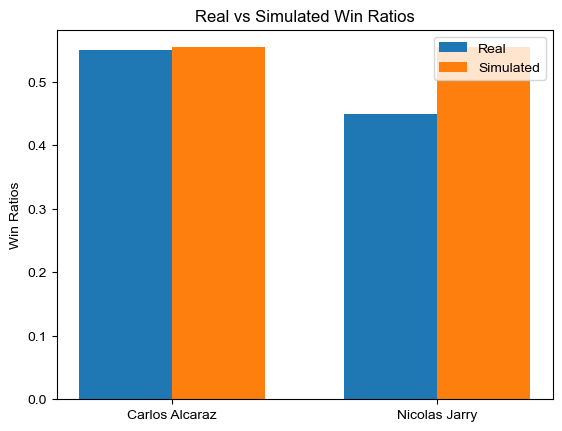

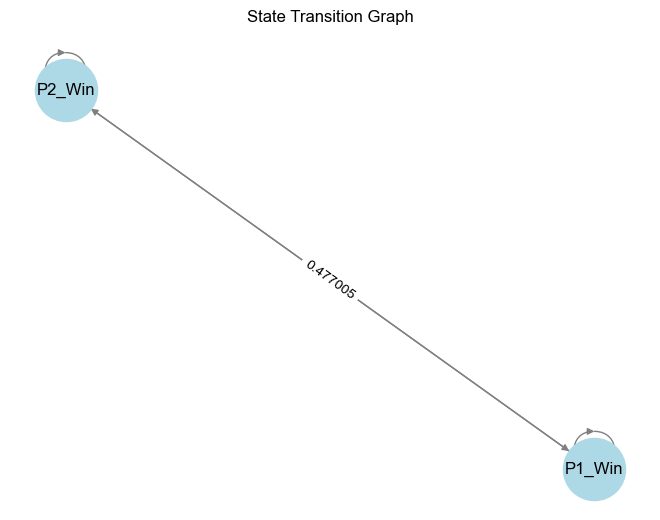

In [7]:

# 输出模拟的结果
# print(f"模拟的前10个状态: {simulation_results[:10]}")

# 计算并输出Alcaraz和Jarry赢得点数的比例
p1_wins = simulation_results.count('P1_win')
p2_wins = simulation_results.count('P2_win')
print(f"Carlos Alcaraz赢得点数的比例: {p1_wins / len(simulation_results)}")
print(f"Nicolas Jarry赢得点数的比例: {p2_wins / len(simulation_results)}")

import matplotlib.pyplot as plt

# 真实的胜率数据
real_p1_win_ratio = 0.55  # 假设Carlos Alcaraz真实赢点比例
real_p2_win_ratio = 0.45  # 假设Nicolas Jarry真实赢点比例

# 模拟赢点比例
simulated_p1_win_ratio = p1_wins / len(simulation_results)
simulated_p2_win_ratio = p1_wins / len(simulation_results)

print(simulated_p1_win_ratio,simulated_p2_win_ratio)

# 绘制比较图
labels = ['Carlos Alcaraz', 'Nicolas Jarry']
real_ratios = [real_p1_win_ratio, real_p2_win_ratio]
simulated_ratios = [simulated_p1_win_ratio, simulated_p2_win_ratio]

x = range(len(labels))  # 横坐标位置
width = 0.35  # 柱子的宽度

fig, ax = plt.subplots()
ax.bar(x, real_ratios, width, label='Real')
ax.bar([p + width for p in x], simulated_ratios, width, label='Simulated')
ax.set_ylabel('Win Ratios')
ax.set_title('Real vs Simulated Win Ratios')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()

import networkx as nx

# 构建有向图网络
G = nx.DiGraph()

# 添加节点
G.add_node('P1_Win')
G.add_node('P2_Win')

# 添加边和转移概率
G.add_edge('P1_Win', 'P1_Win', weight=0.542642)
G.add_edge('P1_Win', 'P2_Win', weight=0.457358)
G.add_edge('P2_Win', 'P1_Win', weight=0.477005)
G.add_edge('P2_Win', 'P2_Win', weight=0.522995)

# 绘制图
pos = nx.spring_layout(G)  # 为每个节点设置位置
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('State Transition Graph')
plt.show()